In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/placement.csv")

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
df = df.iloc[:,1:]

In [5]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0



# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [8]:
import matplotlib.pyplot as plt

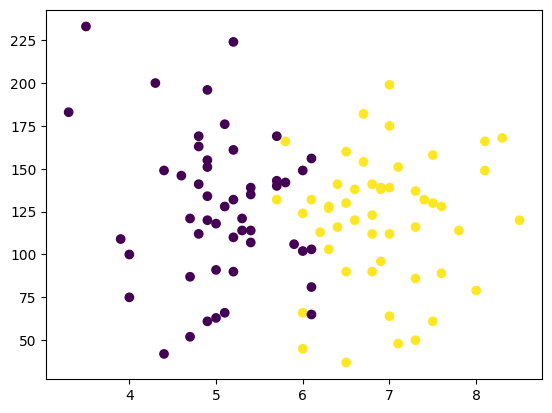

In [9]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])

In [10]:
mean_iq = df['iq'].mean()
std_iq = df['iq'].std()
mean_cgpa = df['cgpa'].mean()
std_cgpa = df['cgpa'].std()
e_iq_cgpa = (df['iq']*df['cgpa']).mean()

In [11]:
corr = (e_iq_cgpa - (mean_iq * mean_cgpa))/(std_iq * std_cgpa)

In [12]:
corr

np.float64(-0.09780276533763095)

In [13]:
df['iq'].corr(df['cgpa'])

np.float64(-0.0987906720582117)

In [14]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [19]:
y_train

,placement
77,1
88,0
12,0
87,1
64,1
...,...
97,1
89,0
21,1
80,0


In [20]:
X_test

,cgpa,iq
7,5.0,63.0
30,7.6,128.0
99,6.2,113.0
90,7.3,86.0
65,8.1,166.0
50,3.5,233.0
48,6.6,138.0
91,7.5,158.0
53,8.3,168.0
98,6.3,103.0


In [21]:
#scaling

from sklearn.preprocessing import StandardScaler


<Axes: xlabel='iq', ylabel='Density'>

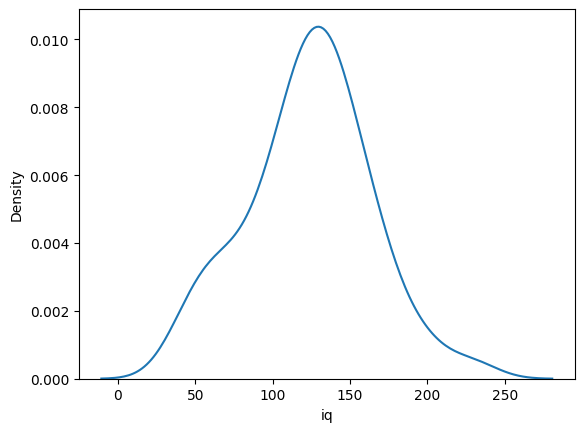

In [22]:
import seaborn as sns
sns.kdeplot(df['iq'])

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_train

array([[ 1.27891691, -1.86518726],
       [-1.40649994,  0.6907676 ],
       [-0.48049413,  0.43259034],
       [-0.20269238,  0.25186626],
       [ 1.00111517, -1.5037391 ],
       [-0.57309471, -0.03212873],
       [-0.66569529,  1.00058031],
       [-1.12869819, -0.90993141],
       [-1.77690226, -1.21974412],
       [-1.03609761,  1.05221576],
       [-0.94349703,  0.84567396],
       [-0.20269238,  0.53586124],
       [-0.48049413,  0.32931944],
       [ 1.00111517, -0.26448826],
       [-1.49910052,  2.00747162],
       [-0.66569529, -0.31612371],
       [-1.77690226, -0.57430097],
       [ 0.44551168, -0.16121736],
       [ 1.09371575, -1.91682272],
       [-0.48049413, -0.21285281],
       [-1.22129877,  0.61331442],
       [-0.1100918 ,  1.12966894],
       [ 0.90851459,  0.43259034],
       [-0.20269238,  1.20712212],
       [ 0.16770994, -0.49684779],
       [-0.48049413, -0.39357689],
       [-1.03609761, -0.26448826],
       [-0.75829587, -1.45210365],
       [-1.12869819,

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_test

array([[-0.85089645, -1.52955683],
       [ 1.55671866,  0.14859536],
       [ 0.26031052, -0.23867053],
       [ 1.27891691, -0.93574913],
       [ 2.01972156,  1.12966894],
       [-2.23990516,  2.85945658],
       [ 0.63071285,  0.40677261],
       [ 1.46411807,  0.92312713],
       [ 2.20492272,  1.18130439],
       [ 0.3529111 , -0.49684779]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

In [36]:
clf.fit(X_train,y_train)

LogisticRegression()

In [31]:
# model evaluation

clf.score(X_train,y_train)

0.9222222222222223

In [39]:
y_pred = clf.predict(X_test)

In [40]:
y_test

,placement
7,0
30,1
99,1
90,1
65,1
50,0
48,1
91,1
53,1
98,1


In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

1.0

In [43]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

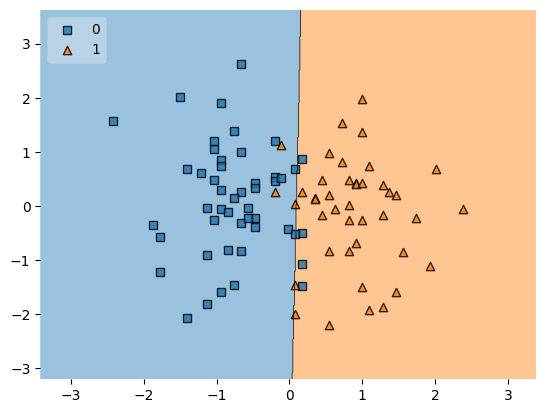

In [44]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [49]:
import pickle

In [50]:
pickle.dump(clf,open('model.pkl','wb'))